In [30]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [31]:
# Upload Data
from google.colab import files
uploaded = files.upload()

Saving test.csv to test (2).csv


In [32]:
bank_data = pd.read_csv("test.csv")
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [33]:
bank_data['default'] = bank_data['default'].map({'no':0,'yes':1,'unknown':0})
bank_data['y'] = bank_data['y'].map({'no':0,'yes':1})

In [34]:
bank_data = bank_data.dropna(subset=['y'])
X = bank_data.drop('y', axis=1)
y = bank_data['y']

# Encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [35]:
# Fitting Random Forest Model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [36]:
#  trained random forest model

y_pred = rf.predict(X_test)

In [37]:
# Evaluating the Random Forest Model

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8928176795580111


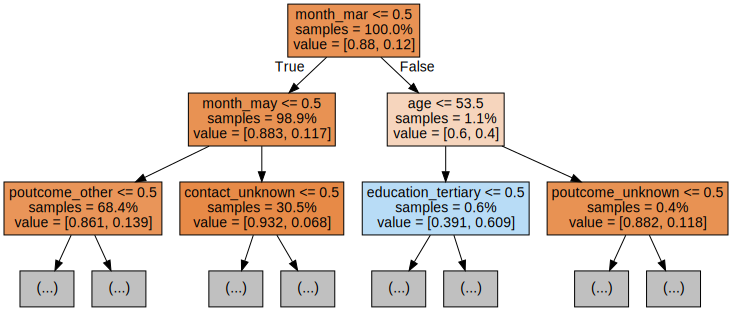

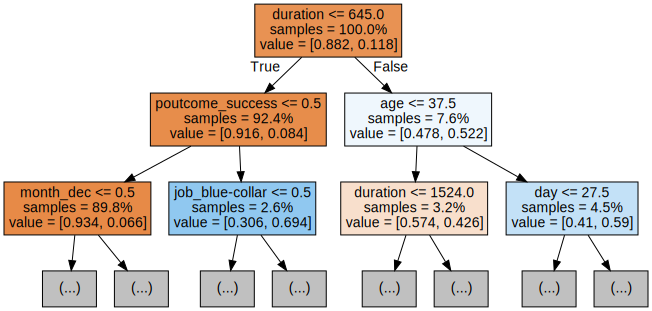

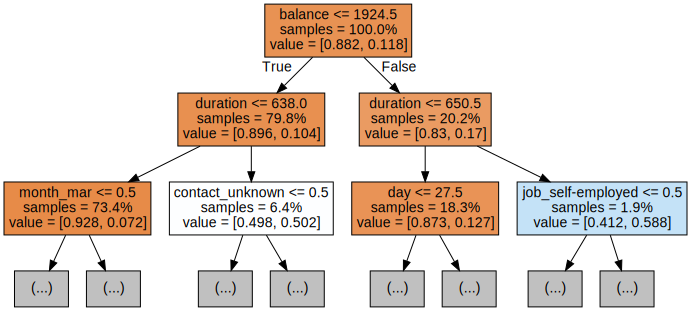

In [38]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [43]:
# Hyperparameter Tuning

param_dist = {
  'n_estimators': randint(100, 500),
  'max_depth': randint(3, 15),
  'min_samples_split': randint(2, 10),
  'min_samples_leaf': randint(1, 5)
}


# Create a random forest classifier
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(
  rf, param_distributions=param_dist,
  n_iter=10, cv=5, scoring='accuracy',
  n_jobs=-1, random_state=42)

In [45]:
# Fit FIRST
rand_search.fit(X_train, y_train)

# THEN access results
best_rf = rand_search.best_estimator_

print("Best hyperparameters:", rand_search.best_params_)


Best hyperparameters: {'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 413}


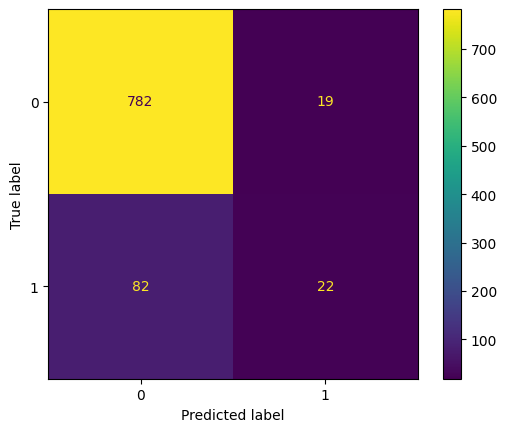

In [47]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Create and train KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Calculate metrics
accuracy = str(accuracy_score(y_test, y_pred))[:5]   # keep 3 decimals
precision = str(precision_score(y_test, y_pred, average='macro'))[:5]
recall = str(recall_score(y_test, y_pred, average='macro'))[:5]

# Print results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.880
Precision: 0.681
Recall: 0.589


<Axes: >

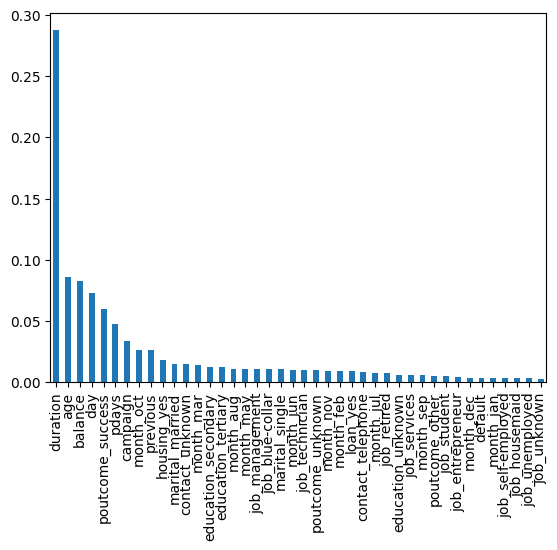

In [55]:
# Create a series containing feature importances from the model and feature names from the training data
importances = pd.Series(best_rf.feature_importances_, index=X_train.columns)
importances.sort_values(ascending=False).plot.bar()